In [32]:
from sklearn.datasets import make_moons

data = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.1)

In [34]:
# voting

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)


In [35]:
vot_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard"
)
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [36]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.828
RandomForestClassifier 0.829
SVC 0.849
VotingClassifier 0.846


In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42, probability=True)


In [38]:
vot_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="soft"
)
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [39]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.828
RandomForestClassifier 0.829
SVC 0.849
VotingClassifier 0.845


In [45]:
# bagging and pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# use bootstrap=False for pasting
# oob_score=True - score validation on out-of-bag instances
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

In [46]:
bag_clf.oob_score_

0.8654444444444445

In [44]:
bag_clf = BaggingClassifier(SVC(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.845

In [47]:
# feature importace
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris.data, iris.target)

for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0943118426714039
sepal width (cm) 0.023498061394438916
petal length (cm) 0.4319529447335866
petal width (cm) 0.4502371512005706


In [49]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rnd_clf.fit(mnist.data, mnist.target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [52]:
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.hot, interpolation='nearest')
    plt.axis("off")

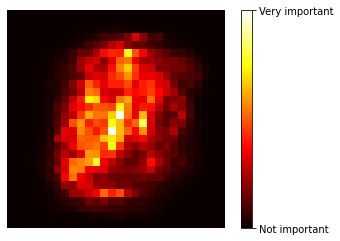

In [53]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [55]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [75]:
# Gradient Boosting
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [77]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [78]:
y3 = y2 - tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [79]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [80]:
# or using sklearn
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [82]:
# taking best n_estimators
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=150)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=74)

In [83]:
# early stopping
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 150):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [85]:
# faster than sklearn
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [86]:
# with early stopping
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)

[0]	validation_0-rmse:0.22500
[1]	validation_0-rmse:0.16179
[2]	validation_0-rmse:0.11969
[3]	validation_0-rmse:0.09146
[4]	validation_0-rmse:0.07319
[5]	validation_0-rmse:0.06173
[6]	validation_0-rmse:0.05498
[7]	validation_0-rmse:0.05251
[8]	validation_0-rmse:0.05047
[9]	validation_0-rmse:0.05066


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Exerices

In [93]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target.astype(np.float32)

In [94]:
X_train, X_val, X_test = X[:50000], X[50000:60000], X[60000:]
y_train, y_val, y_test = y[:50000], y[50000:60000], y[60000:]

In [96]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
ext_tree = ExtraTreesClassifier(random_state=42, n_jobs=-1)
svm_clf = SVC(random_state=42)

In [98]:
from sklearn.model_selection import GridSearchCV

param1 = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [2, 5, 10, 15, 20],
    "min_samples_leaf": [2, 5, 10, 20],

}
param2 = {
    "C": [0.5, 1, 3, 5, 8]
}

grid1 = GridSearchCV(rnd_clf, param1, n_jobs=-1, cv=3)
grid2 = GridSearchCV(svm_clf, param2, n_jobs=-1, cv=3)
grid1.fit(X_train[:10000], y_train[:10000])
grid2.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.5, 1, 3, 5, 8]})

In [101]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1, **grid1.best_params_)
ext_tree = ExtraTreesClassifier(random_state=42, n_jobs=-1, **grid1.best_params_)
svm_clf = SVC(random_state=42, probability=True, **grid2.best_params_)

for clf in (rnd_clf, ext_tree, svm_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_val, y_val))

RandomForestClassifier 0.9714
ExtraTreesClassifier 0.9734
SVC 0.984


In [102]:
from sklearn.ensemble import VotingClassifier

named_clf = [
    ("rnd", rnd_clf),
    ("ext", ext_tree),
    ("svc", svm_clf),
]
v = VotingClassifier(named_clf, n_jobs=-1)

v.fit(X_train, y_train)
v.score(X_val, y_val)

0.9762

In [ ]:
# when it's trained we can delete estimator without re-training entire ensamble
# np to remove rnd classifier
# v.set_params(rnd=None)
# del v.estimators_[0] # it is first in named_clf

In [103]:
# let's check soft voting
v.voting = "soft"
v.score(X_val, y_val)

0.9833

In [104]:
# let's remove weakest learner 
v.set_params(rnd=None)
del v.estimators_[0]
v.score(X_val, y_val)

# it works a little better

0.9841

In [112]:
# stacking ensamble

y_pred = np.empty(y_val.shape)

for clf in (rnd_clf, ext_tree, svm_clf):
    y_pred_small = clf.predict(X_val).reshape(-1, 1)
    y_pred = np.c_[y_pred, y_pred_small]

In [113]:
y_pred = y_pred[:, 1:] # remove empty column

In [117]:
blender = ExtraTreesClassifier(random_state=42, n_jobs=-1, bootstrap=True, oob_score=True, **grid1.best_params_)
blender.fit(y_pred, y_val)

ExtraTreesClassifier(bootstrap=True, max_depth=20, min_samples_leaf=2,
                     n_estimators=200, n_jobs=-1, oob_score=True,
                     random_state=42)

In [118]:
blender.oob_score_

0.9814

In [119]:
X_test_pred = np.empty(y_test.shape)
for clf in (rnd_clf, ext_tree, svm_clf):
    y_pred_small = clf.predict(X_test).reshape(-1, 1)
    X_test_pred = np.c_[X_test_pred, y_pred_small]
X_test_pred = X_test_pred[:, 1:]

In [120]:
y_pred_test = blender.predict(X_test_pred)

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.9797